# <a id='toc1_'></a>[Template: Árbol de Decisión modelo de Clasificación en Scikit-Learn](#toc0_)

## <a id='toc1_1_'></a>[Análisis Exploratorio de Datos](#toc0_)


- Nombre: Jorge Emiliano Pomar Mendoza
- Matrícula: A01709338
- Fecha: 03 de abril de 2025

**Índice**<a id='toc0_'></a>    
- [Template: Árbol de Decisión modelo de Clasificación en Scikit-Learn](#toc1_)    
  - [Análisis Exploratorio de Datos](#toc1_1_)    
  - [Modelo de Clasificación](#toc1_2_)    
  - [Conclusiones](#toc1_3_)    
    - [Decision Tree](#toc1_3_1_)    
      - [Variables importantes clf con max_depth=3](#toc1_3_1_1_)    
      - [Variables importantes clf con max_depth=5](#toc1_3_1_2_)    
      - [Variables importantes clf con max_depth=10](#toc1_3_1_3_)    
    - [KNN](#toc1_3_2_)    
    - [Nearest Centroid](#toc1_3_3_)    
    - [Conclusion Final](#toc1_3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

1. Importar las librerías necesarias para la realización de la actividad y el dataset propuesto para la ejercitación.


In [200]:
###Completar
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

2. Imprimir las 5 primeras filas del dataset.


In [201]:
###Completar
df = pd.read_csv("Titanic.csv")

In [202]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


3. Desplegar el `info()` de este dataframe.


In [ ]:
###Completar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 33.6 KB


## <a id='toc1_2_'></a>[Modelo de Clasificación](#toc0_)


4. Separar los features en $X$ e $y$


In [204]:
###Completar
X = df.drop("Survived", axis=1)
y = df["Survived"]

5. Separar los datos en _Train_ (70 %) y _Test_ (30 %) con un `random_state=42`.


In [205]:
###Completar
# Primero le decimos cuales son nuestros datos de entrenamiento y cuales son de test

# Para esto tambien le decimos que para test es el 30% y para entrenar el 70%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y, train_size=0.7
)

6. Crear un modelo de clasificación para cada algoritmo:

- Nearest Centroid
- KNN
- Decision Tree


In [206]:
###Completar
# Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)

In [207]:
# Nearest Centroid
nearest_centroid_clf = NearestCentroid()

In [208]:
k_values = [3, 5, 10]
for k in k_values:
    clf_knn_classify = KNeighborsClassifier(n_neighbors=k)

    clf_knn_classify.fit(X_train, y_train)

    clf_knn_predict = clf_knn_classify.predict(X_test)

    print("KNN k= %i " % k, accuracy_score(y_test, clf_knn_predict))

KNN k= 3  0.7255813953488373
KNN k= 5  0.7348837209302326
KNN k= 10  0.772093023255814


7. Entrenar los modelos creados


In [209]:
# Entrenar el modelo de Decision Tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [210]:
# Entrenar el modelo de Nearest Centroid
nearest_centroid_clf.fit(X_train, y_train)

NearestCentroid()

8. Realizar la predicción de los modelos en Train y Test


In [211]:
###Completar
# Realizar la predicción para el modelo de Decision Tree
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [212]:
# Realizar la predicción para el modelo de Nearest Centroid
y_train_pred_nc = nearest_centroid_clf.predict(X_train)
y_test_pred_nc = nearest_centroid_clf.predict(X_test)

9. Calcular las métrica de Accuracy para Train y Test


In [213]:
###Completar
# Para medir la efectividad usando accuracy score
# Accuracy for Decision Tree
print("Decision Tree - Training set Accuracy:", accuracy_score(y_train, y_train_pred))
print("Decision Tree - Testing set Accuracy:", accuracy_score(y_test, y_test_pred))

Decision Tree - Training set Accuracy: 0.8096192384769539
Decision Tree - Testing set Accuracy: 0.7767441860465116


In [214]:
# Accuracy for Nearest Centroid
print(
    "Nearest Centroid - Training set Accuracy:",
    accuracy_score(y_train, y_train_pred_nc),
)
print(
    "Nearest Centroid - Testing set Accuracy:", accuracy_score(y_test, y_test_pred_nc)
)

Nearest Centroid - Training set Accuracy: 0.49298597194388777
Nearest Centroid - Testing set Accuracy: 0.4930232558139535


- Con los resultados, podemos observar que el mejor algoritmo es el decision tree, que presenta la mayor cantidad de accuracy tanto en entrenamiento como en testing. Y el menos eficiente es el Nearest Centroid, que presenta el menor accuracy en ambos casos, aunque tienen un balance fuerte entre entrenamiento y testing, lo que indica que no está overfitting.


10. Graficar las variables de importancia del Árbol de Decisión


[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.483\nsamples = 499\nvalue = [296, 203]\nclass = Si'),
 Text(0.25, 0.625, 'Pclass <= 1.5\ngini = 0.327\nsamples = 320\nvalue = [254, 66]\nclass = Si'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 53.0\ngini = 0.486\nsamples = 72\nvalue = [42, 30]\nclass = Si'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 54\nvalue = [27, 27]\nclass = Si'),
 Text(0.1875, 0.125, 'gini = 0.278\nsamples = 18\nvalue = [15, 3]\nclass = Si'),
 Text(0.375, 0.375, 'Age <= 9.5\ngini = 0.248\nsamples = 248\nvalue = [212, 36]\nclass = Si'),
 Text(0.3125, 0.125, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.195\nsamples = 229\nvalue = [204, 25]\nclass = Si'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.359\nsamples = 179\nvalue = [42, 137]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Age <= 2.5\ngini = 0.101\nsamples = 113\nvalue = [6, 107]\nclass = No'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples 

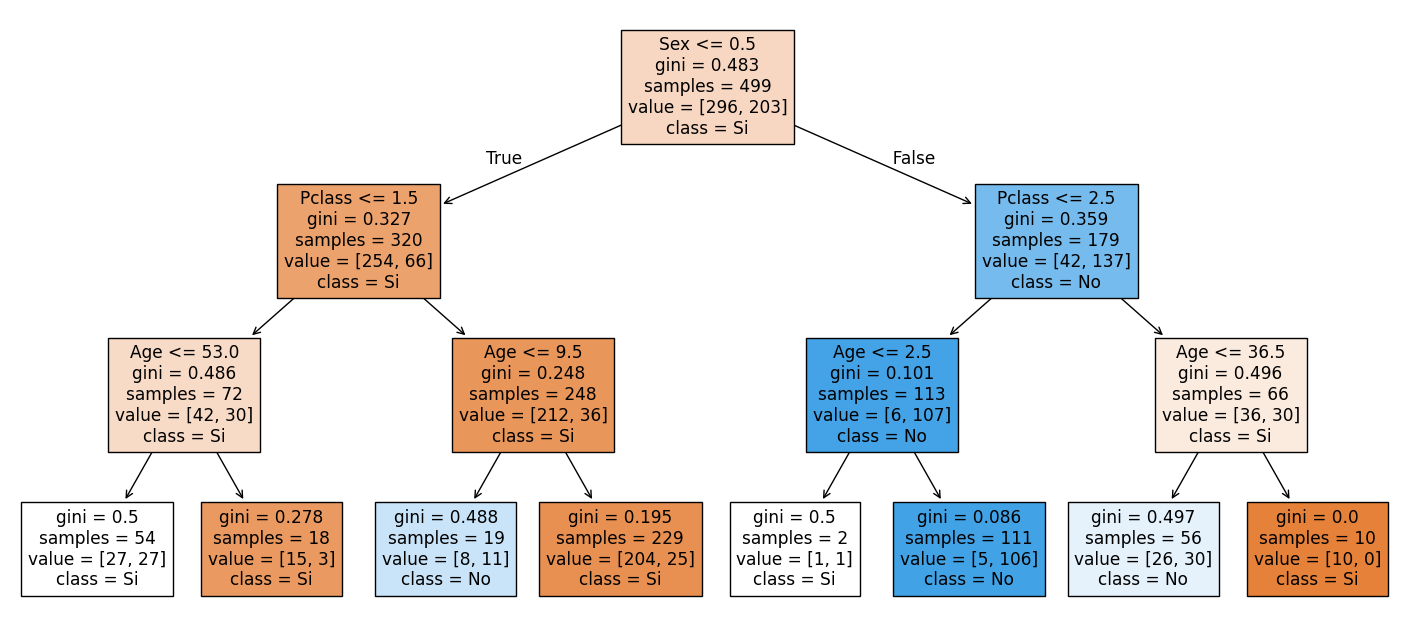

In [215]:
plt.figure(figsize=(18, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Si", "No"], filled=True)

11. Despliega la visualización del modelo de árbol de decisión generado


In [216]:
###Completar
plt.show()

12. Prueba con otros parámetros para buscar mejorar los modelos previos.


In [217]:
###Completar

# Probaremos con más hojas para ver si mejora el accuracy
# Ajustamos el parámetro max_depth para aumentar el número de hojas
clf2 = DecisionTreeClassifier(max_depth=10)

# Entrenamos el modelo nuevamente
clf2.fit(X_train, y_train)

# Realizamos predicciones
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)

# Calculamos y mostramos el accuracy
print(
    "Decision Tree - Training set Accuracy with max_depth=10:",
    accuracy_score(y_train, y_train_pred),
)
print(
    "Decision Tree - Testing set Accuracy with max_depth=10:",
    accuracy_score(y_test, y_test_pred),
)

Decision Tree - Training set Accuracy with max_depth=10: 0.9378757515030061
Decision Tree - Testing set Accuracy with max_depth=10: 0.7674418604651163


[Text(0.5897892441860465, 0.9545454545454546, 'Sex <= 0.5\ngini = 0.483\nsamples = 499\nvalue = [296, 203]\nclass = Si'),
 Text(0.3627180232558139, 0.8636363636363636, 'Pclass <= 1.5\ngini = 0.327\nsamples = 320\nvalue = [254, 66]\nclass = Si'),
 Text(0.4762536337209302, 0.9090909090909092, 'True  '),
 Text(0.2247093023255814, 0.7727272727272727, 'Age <= 53.0\ngini = 0.486\nsamples = 72\nvalue = [42, 30]\nclass = Si'),
 Text(0.17034883720930233, 0.6818181818181818, 'Age <= 47.5\ngini = 0.5\nsamples = 54\nvalue = [27, 27]\nclass = Si'),
 Text(0.13604651162790699, 0.5909090909090909, 'Age <= 43.5\ngini = 0.493\nsamples = 43\nvalue = [24, 19]\nclass = Si'),
 Text(0.12674418604651164, 0.5, 'Age <= 36.5\ngini = 0.5\nsamples = 37\nvalue = [18, 19]\nclass = No'),
 Text(0.08604651162790698, 0.4090909090909091, 'Age <= 33.5\ngini = 0.49\nsamples = 28\nvalue = [12, 16]\nclass = No'),
 Text(0.06046511627906977, 0.3181818181818182, 'Age <= 28.5\ngini = 0.5\nsamples = 22\nvalue = [11, 11]\nclass = 

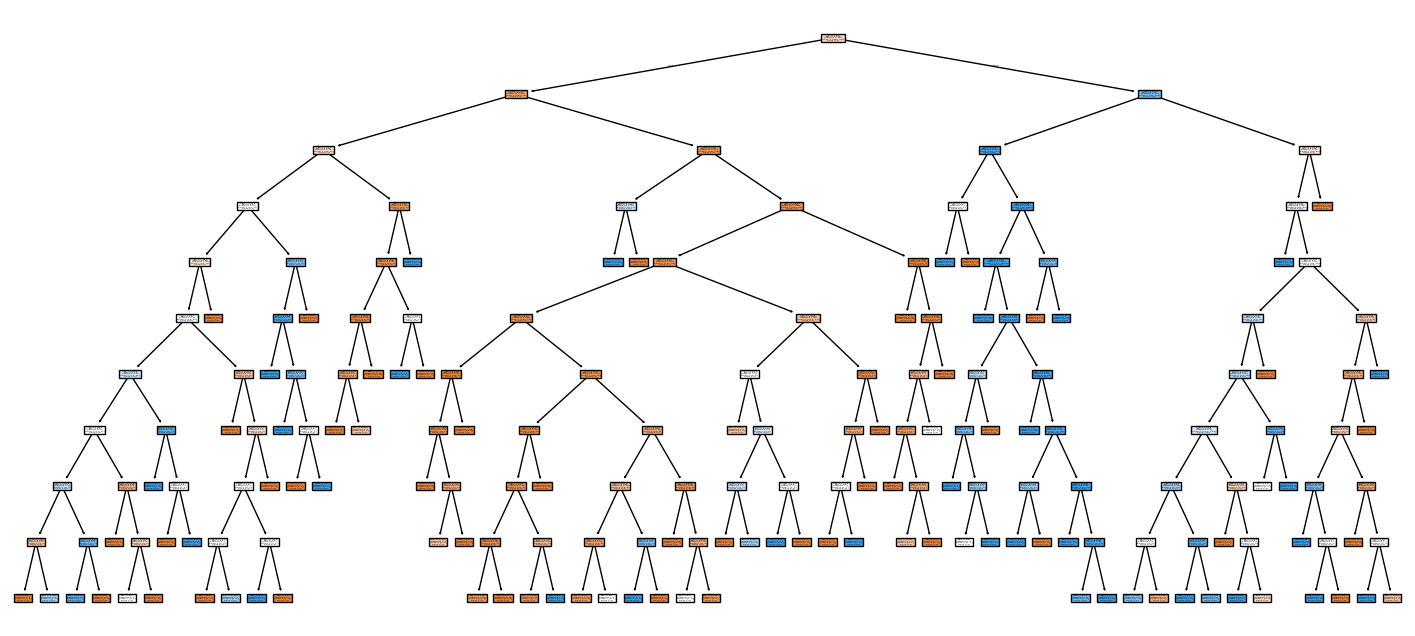

In [218]:
plt.figure(figsize=(18, 8))
plot_tree(clf2, feature_names=X.columns, class_names=["Si", "No"], filled=True)

- Aquí podemos ver que obtuvimos el mayor accuracy hasta ahorita, pero por la cantidad de información que mostró en la gráfica, esto es overfitting. Además de que con el max depth le estamos diciendo que la proporción de data para training y test es de 70/30, pero el modelo se está entrenando con el 100% de la data.


In [219]:
# Ahora intentaremos con restricción de hojas pero con más de 3
clf3 = DecisionTreeClassifier(max_depth=5)

# Entrenamos el modelo nuevamente
clf3.fit(X_train, y_train)

# Realizamos predicciones
y_train_pred_clf3 = clf3.predict(X_train)
y_test_pred_clf3 = clf3.predict(X_test)

# Calculamos y mostramos el accuracy
print(
    "Decision Tree - Training set Accuracy (max_depth=5):",
    accuracy_score(y_train, y_train_pred_clf3),
)
print(
    "Decision Tree - Testing set Accuracy (max_depth=5):",
    accuracy_score(y_test, y_test_pred_clf3),
)

Decision Tree - Training set Accuracy (max_depth=5): 0.8597194388777555
Decision Tree - Testing set Accuracy (max_depth=5): 0.8232558139534883


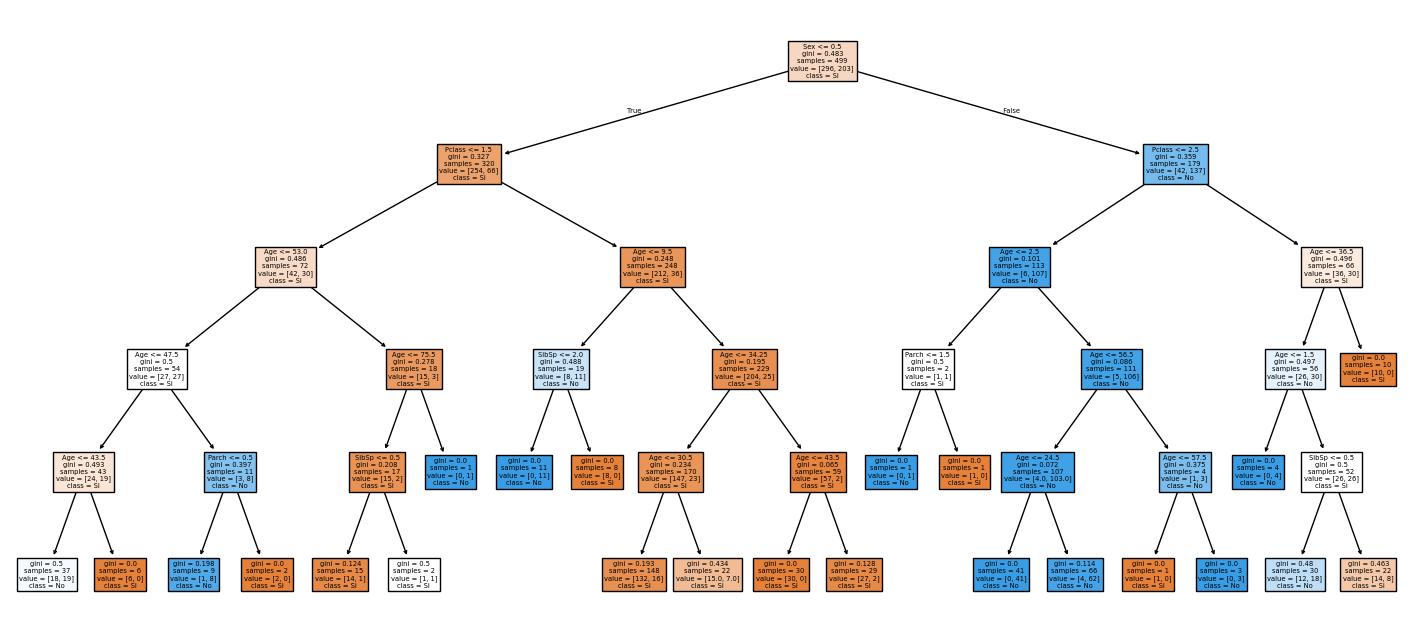

In [220]:
plt.figure(figsize=(18, 8))
plot_tree(clf3, feature_names=X.columns, class_names=["Si", "No"], filled=True)
plt.show()

- Con esto podemos observar una gráfica más legible y un resultado del accuracy balanceado. Claro que el accuracy bajó en comparación, pero el modelo tiene una mejor proporción de datos y no está sobreajustado dandole más datos a entrenar.


## <a id='toc1_3_'></a>[Conclusiones](#toc0_)

Incluye tus conclusiones para cada algoritmo, considerando:

- Hay Overfitting?
- Hay Underfitting?
- Desempeño
- Variables más importantes
- ¿Cómo se interpretan los resultados de su visualización?


### <a id='toc1_3_1_'></a>[Decision Tree](#toc0_)

- **¿Hay Overfitting?**
  - Encontré que el modelo presenta overfitting cuando está al max deptch 10. Esto porque utiliza la mayor cantidad de datos para entrenar pero pocos para testear. Aún así obtuvo el mayor accuracy.
- **¿Hay Underfitting?**
  - Encontré que el modelo con max depth 3 (El que se probó al principio) podría tener underfitting ya que no captura la suficiente información de los datos, esto se puede observar en el resultado de accuracy el cual es bajo.
- **Desempeño:**
- Por último el modelo más balanceado se obtuvo con max depth = 5. Los resultados de accuracy eran altos en ambos casos y la gráfica de variables de importancia mostraba una buena proporción de datos.
- **Variables más importantes:** Las variables más importantes son 'Sex', 'Age' y 'Pclass' con max length 5.
- **Interpretación de la visualización:** El árbol es bueno para visualizar cómo actúan las variables dentro del dataset, pero para analizar el modelo completo es muy ineficiente cuando se le da un max depth alto. En este caso, el árbol se vuelve muy grande y difícil de leer. Por lo que es mejor utilizarlo con un max depth bajo para poder visualizarlo mejor y entender cómo actúan las variables entre sí.


#### <a id='toc1_3_1_1_'></a>[Variables importantes clf con max_depth=3](#toc0_)


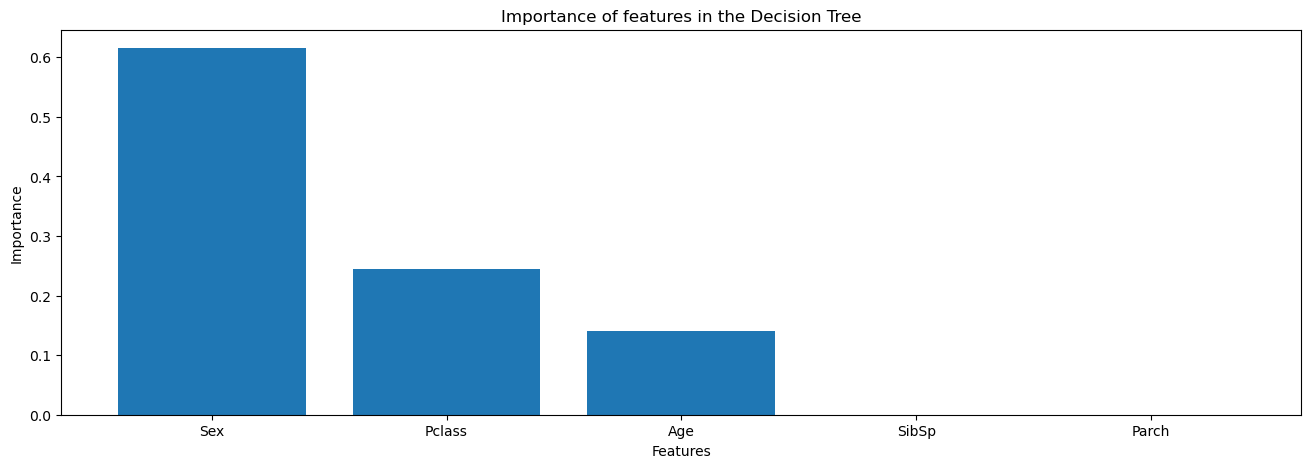

In [ ]:
features = dict(zip(X.columns, clf.feature_importances_))

sorted_dict_desc = dict(
    sorted(features.items(), key=lambda item: item[1], reverse=True)
)
fig = plt.figure(figsize=(16, 5))
plt.bar(sorted_dict_desc.keys(), sorted_dict_desc.values())
plt.xlabel("Features")
plt.title("Importance of features in the Decision Tree")
plt.ylabel("Importance")
plt.show()

#### <a id='toc1_3_1_2_'></a>[Variables importantes clf con max_depth=5](#toc0_)


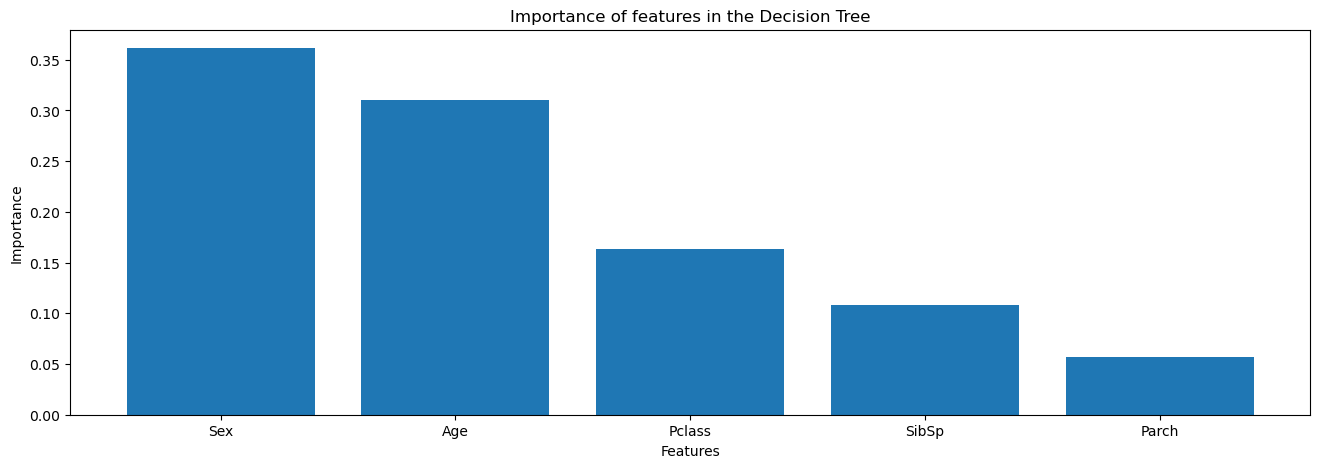

In [ ]:
features = dict(zip(X.columns, clf2.feature_importances_))

sorted_dict_desc = dict(
    sorted(features.items(), key=lambda item: item[1], reverse=True)
)
fig = plt.figure(figsize=(16, 5))
plt.bar(sorted_dict_desc.keys(), sorted_dict_desc.values())
plt.xlabel("Features")
plt.title("Importance of features in the Decision Tree")
plt.ylabel("Importance")
plt.show()

#### <a id='toc1_3_1_3_'></a>[Variables importantes clf con max_depth=10](#toc0_)


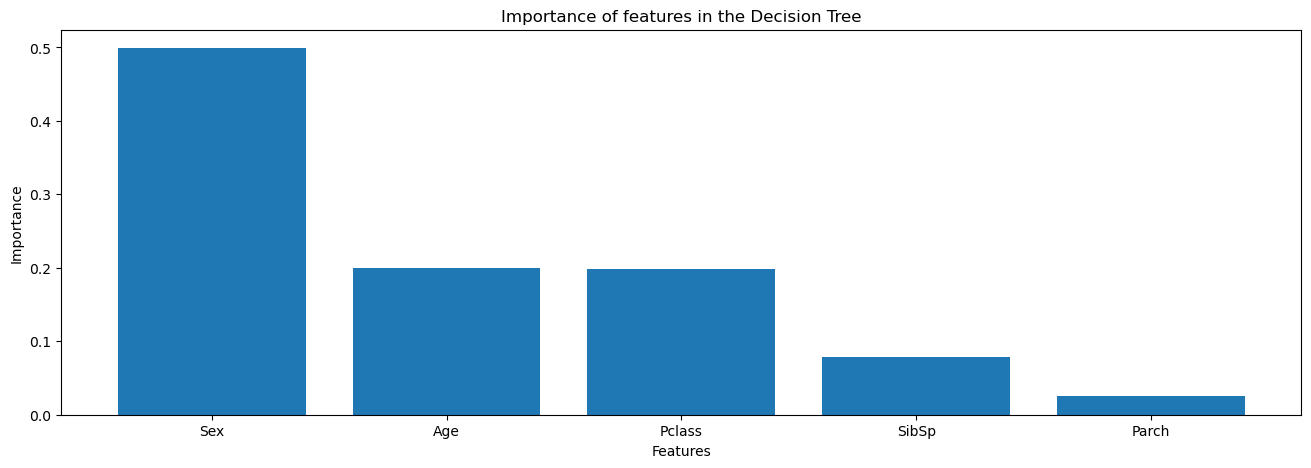

In [ ]:
features = dict(zip(X.columns, clf3.feature_importances_))

sorted_dict_desc = dict(
    sorted(features.items(), key=lambda item: item[1], reverse=True)
)
fig = plt.figure(figsize=(16, 5))
plt.bar(sorted_dict_desc.keys(), sorted_dict_desc.values())
plt.xlabel("Features")
plt.title("Importance of features in the Decision Tree")
plt.ylabel("Importance")
plt.show()

### <a id='toc1_3_2_'></a>[KNN](#toc0_)

- **¿Hay Overfitting?** Podríamos decir que puede haber overfitting con k=10 por la cantidad de vecinos. Pero el accuracy no es tan alto como para considerarlo un problema. En este caso, el modelo no se ajusta demasiado a los datos de entrenamiento, lo que podría ser una señal de que no está aprendiendo lo suficiente.
- **¿Hay Underfitting?** Realmente con los tres valores (k=3, k=5 y k=10) hay eficiencia baja en comparación con el árbol de decisión. Podríamos decir que el modelo tiene un poco de underfitting.
- **Desempeño:** El mejor desempeño se logra con un valor intermedio de k=5, donde el modelo encuentra un balance entre la cantidad de vecinos y el accuracy.
- **Variables más importantes:** 
    Las más importantes son: 
    Impacto al eliminar Pclass: 0.0419
    Impacto al eliminar Sex: 0.1070
    Impacto al eliminar Age: 0.0093
    Impacto al eliminar SibSp: -0.0279
    Impacto al eliminar Parch: -0.0186

    Las cuales no cambian dependiendo del valor de k.
- **Interpretación de la visualización:** 
  No hay una manera visual de ver los datos en este caso como los árboles de decisión. Pero podemos ver que el modelo se comporta de manera similar a los árboles de decisión, donde el valor de k es el número de vecinos más cercanos que se utilizan para hacer la predicción. En este caso, el modelo no se ajusta demasiado a los datos de entrenamiento, lo que podría ser una señal de que no está aprendiendo lo suficiente. Esto se puede ver en el accuracy. 


In [ ]:
from sklearn.metrics import accuracy_score

for k in k_values:
    print("Evaluando importancia de variables para KNN con k=", k)
    base_clf = KNeighborsClassifier(n_neighbors=k)
    base_clf.fit(X_train, y_train)
    base_accuracy = accuracy_score(y_test, base_clf.predict(X_test))
    print("Accuracy:", base_accuracy)
    
    for feature in X.columns:
        X_train_reduced = X_train.drop(columns=[feature])
        X_test_reduced = X_test.drop(columns=[feature])
        
        clf_reduced = KNeighborsClassifier(n_neighbors=k)
        clf_reduced.fit(X_train_reduced, y_train)
        reduced_accuracy = accuracy_score(y_test, clf_reduced.predict(X_test_reduced))
        
        impact = base_accuracy - reduced_accuracy
        print(f"Impacto al eliminar {feature}: {impact:.4f}")
    print("-" * 50)

Evaluando importancia de variables para KNN con k= 3
Accuracy: 0.7255813953488373
Impacto al eliminar Pclass: 0.0419
Impacto al eliminar Sex: 0.1070
Impacto al eliminar Age: 0.0093
Impacto al eliminar SibSp: -0.0279
Impacto al eliminar Parch: -0.0186
--------------------------------------------------
Evaluando importancia de variables para KNN con k= 5
Accuracy: 0.7348837209302326
Impacto al eliminar Pclass: 0.0233
Impacto al eliminar Sex: 0.0558
Impacto al eliminar Age: -0.0279
Impacto al eliminar SibSp: -0.0372
Impacto al eliminar Parch: -0.0372
--------------------------------------------------
Evaluando importancia de variables para KNN con k= 10
Accuracy: 0.772093023255814
Impacto al eliminar Pclass: 0.0791
Impacto al eliminar Sex: 0.0930
Impacto al eliminar Age: -0.0093
Impacto al eliminar SibSp: 0.0372
Impacto al eliminar Parch: 0.0186
--------------------------------------------------


### <a id='toc1_3_3_'></a>[Nearest Centroid](#toc0_)

- **¿Hay Overfitting?** La verdad no observé nada que me indicara overfitting, ya que el accuracy de test y train son muy similares.
- **¿Hay Underfitting?** Igual que con overfitting, no vi nada que me indicara underfitting. El modelo parece que tiene un buen balance entre ambos.
- **Desempeño:** Como es un algoritmo muy simple, no tiene un desempeño tan bueno como los otros modelos. El accuracy es bajo en ambos casos. 
- **Variables más importantes:** Este modelo no da información sobre la importancia de las variables.
- **Interpretación de la visualización:** No hay una visualización para este modelo, ya que es un algoritmo muy simple. No se puede interpretar de la misma manera que un árbol de decisión.


### <a id='toc1_3_4_'></a>[Conclusion Final](#toc0_)
- Considerando los resultados, puedo decir que el algoritmo más efectivo para este dataset es el Arbol de decisión con un max length de 5. Tiene un buen balance entre el accuracy de test y train, además de que este accuracy es alto. Los datos son legibles en la gráfica de variables de importancia y el árbol es fácil de interpretar.